In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.mlab as mlab

In [2]:
customers = pd.read_csv(r'C:\Users\elodi\Downloads\dataset_P4 (1)\customers.csv')
products = pd.read_csv(r'C:\Users\elodi\Downloads\dataset_P4 (1)\products.csv')
transactions = pd.read_csv(r'C:\Users\elodi\Downloads\dataset_P4 (1)\transactions.csv')

#### Mission n° 1
Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

##### DF customers 

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


##### 
Vérification des valeurs nulles et des doublons dans client_id

In [4]:
print(customers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [5]:
customers.loc[customers[['client_id']].duplicated(keep=False),:]

,client_id,sex,birth


# 
Age

In [6]:
customers['birth'].describe()

count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

In [7]:
customers_oldest = customers.birth.sort_values().iloc[1]
customers_youngest = customers.birth.sort_values().iloc[-1]
print(f"Année de naissance du client le plus agé : {customers_oldest}")
print(f"Année de naissance du client le plus jeune : {customers_youngest}")

Année de naissance du client le plus agé : 1929
Année de naissance du client le plus jeune : 2004


{'whiskers': [<matplotlib.lines.Line2D at 0x27600093a00>,
 'caps': [<matplotlib.lines.Line2D at 0x276000ad100>,
 'boxes': [<matplotlib.lines.Line2D at 0x276000936a0>],
 'medians': [<matplotlib.lines.Line2D at 0x276000ad7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x276000adb20>],
 'means': []}

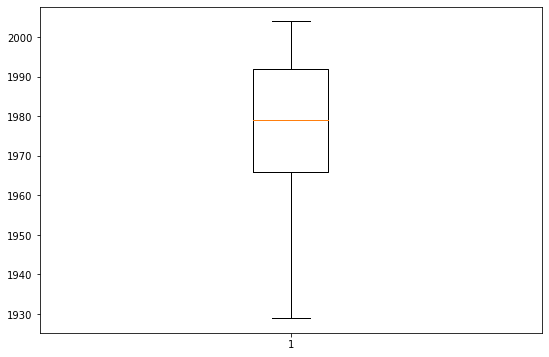

In [8]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(customers['birth'])

# 
Verification sexe (si différent de f ou m)

In [9]:
customers['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

##### DF products 
(Même démarche)

In [10]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
print(len(products['id_prod']))

3287


In [12]:
print(products.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


In [13]:
products['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

#  
On remarque un prix négatif, je vérifie si c'est le seul

In [14]:
negative_price = products.loc[products['price'] <= 0,:]
negative_price

,id_prod,price,categ
731,T_0,-1.0,0


# 
Categ

In [15]:
products['categ'].describe()

count    3287.000000
mean        0.370246
std         0.615387
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: categ, dtype: float64

In [16]:
products['categ'].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

##### DF transactions

In [17]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [18]:
transactions.dtypes 

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [19]:
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [20]:
transactions.loc[transactions[['date']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


# 
On remarque des lignes tests qui ont toutes comme client_id ct_1 ou ct_0, et id_prod T_0

In [21]:
test_dates = transactions[transactions.date.str.contains("test")].copy()
print(test_dates)

       id_prod                             date session_id client_id
1431       T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1
2365       T_0  test_2021-03-01 02:30:02.237446        s_0      ct_1
2895       T_0  test_2021-03-01 02:30:02.237414        s_0      ct_1
5955       T_0  test_2021-03-01 02:30:02.237441        s_0      ct_0
7283       T_0  test_2021-03-01 02:30:02.237434        s_0      ct_1
...        ...                              ...        ...       ...
332594     T_0  test_2021-03-01 02:30:02.237445        s_0      ct_0
332705     T_0  test_2021-03-01 02:30:02.237423        s_0      ct_1
332730     T_0  test_2021-03-01 02:30:02.237421        s_0      ct_1
333442     T_0  test_2021-03-01 02:30:02.237431        s_0      ct_1
335279     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0

[200 rows x 4 columns]


# 
Suppression des lignes tests

In [22]:
transactions.drop(transactions[transactions['id_prod'] == 'T_0' ].index, inplace=True)

# 
Conversion de la variable date au bon format 

In [23]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

#### On vérifie s'il y a d'autres "tests" dans les deux autres dataframes.  
Tout d'abord df customers (vérification avec client_id car présent dans transactions et clients)

In [24]:
customers.loc[customers['client_id'] == 'ct_0',:] 

,client_id,sex,birth
2735,ct_0,f,2001


In [25]:
customers.loc[customers['client_id'] == 'ct_1',:]

,client_id,sex,birth
8494,ct_1,m,2001


# 
Suppression des lignes de test

In [26]:
customers.drop(2735 , inplace=True)
customers.drop(8494 , inplace=True)

# 
DF products (vérification avec id_prod car présent dans transactions et clients)

In [27]:
products.loc[products['id_prod'] == 'T_0', :]

,id_prod,price,categ
731,T_0,-1.0,0


In [28]:
products.drop(731 , inplace=True)

##### Creation d'un dataframe principal, merge des 3 dataframes pour l'analyse des données 

In [29]:
df_principal = (
                 transactions
                .merge(products, how='left', on='id_prod')
                .merge(customers, how='left', on='client_id')
)
df_principal.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980


In [30]:
print(df_principal.isnull().sum())

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
sex             0
birth           0
dtype: int64


In [31]:
df_nan = df_principal[df_principal.isna().any(axis=1)]
df_nan.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988


In [32]:
df_principal.loc[df_principal['id_prod'] == '0_2245', :]

,id_prod,date,session_id,client_id,price,categ,sex,birth
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988
...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,f,1979
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN,f,1983
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,f,1984
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN,f,1973


# 
Vérification dans le df products si l'id_prod 0_2245 existe

In [33]:
products.loc[products['id_prod'] == '0_2245', :]

,id_prod,price,categ


# 
Le produit n'existe pas, on supprime donc les lignes correspondantes 

In [34]:
df_principal.drop(df_principal[df_principal['id_prod'] == '0_2245' ].index, inplace=True)

##### Création de colonnes année, mois, âge pour plus de visibilité lors de l'analyse 

In [35]:
df_principal['annee'] = df_principal.date.apply(lambda x: x.year)
df_principal['mois'] = df_principal.date.apply(lambda x: x.month)
df_principal['anneemois'] = df_principal.date.apply(lambda x: int(str(x.year) + str(x.month))) 
df_principal['age'] = 2022 - df_principal.birth.astype(int)
df_principal.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,annee,mois,anneemois,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,2021,4,20214,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,2022,2,20222,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,2021,9,20219,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,2021,10,202110,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,2021,7,20217,42


In [36]:
display(df_principal.isnull().any())

id_prod       False
date          False
session_id    False
client_id     False
price         False
categ         False
sex           False
birth         False
annee         False
mois          False
anneemois     False
age           False
dtype: bool

In [37]:
df_principal.to_csv("df_principal.csv", index = False)